In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report

In [98]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Data Preprocessing :

In [99]:
df.shape

(400, 5)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [101]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [102]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [103]:
# No. of duplicated rows
df.duplicated().sum()

0

In [104]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [105]:
df['EstimatedSalary'].value_counts()

EstimatedSalary
72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: count, Length: 117, dtype: int64

In [106]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [107]:
# Drop 'UserID' column as it is not needed for analysis
df.drop('User ID', axis=1, inplace=True)

### EDA :-

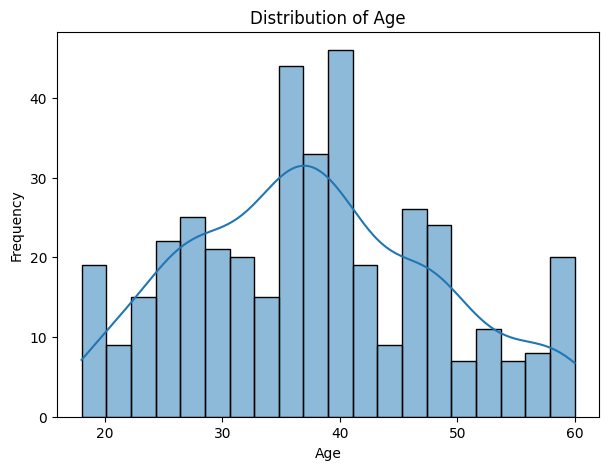

In [108]:
# Histogram for 'Age'
plt.figure(figsize=(7, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

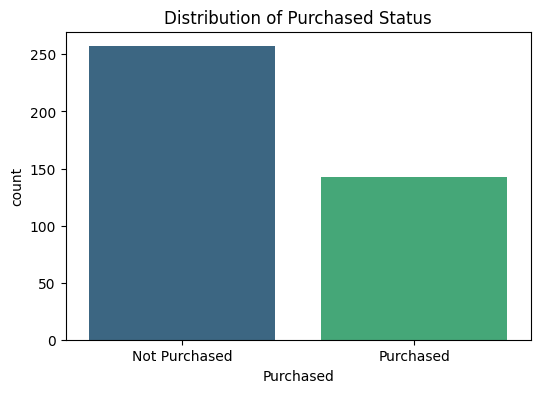

In [109]:
# Countplot for 'Purchased'
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=df,palette='viridis')
plt.title('Distribution of Purchased Status')
plt.xticks([0, 1], ['Not Purchased', 'Purchased'])
plt.show()

### Splitting Dataset :

In [110]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [111]:
print("Gender Encoding:", dict(enumerate(le.classes_)))


Gender Encoding: {0: 'Female', 1: 'Male'}


In [112]:
df.sample(5)

,Gender,Age,EstimatedSalary,Purchased
156,1,46,59000,0
177,1,25,22000,0
239,0,53,143000,1
59,0,32,117000,0
81,1,39,42000,0


In [113]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [114]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [115]:
X_train , X_test, y_train, y_test = train_test_split(X_scaled,y, 
                                                    test_size=0.2, random_state=42)

In [116]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape )

(320, 3) (80, 3)
(320,) (80,)


## Hyperparameter Tuning :

In [ ]:
# GridSearchCV for Hyperparameter Tuning
param_grid = {
            'C': [0.1, 1, 10, 100],                         # Regularization parameter
            'gamma': [1, 0.1, 0.01, 0.001],                 # Kernel coefficient
            'kernel': ['rbf', 'poly', 'sigmoid', 'linear']  # Different kernels
             }

In [118]:
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=2)

In [119]:
print("\n✅ Best Parameters from GridSearchCV:", grid.best_params_)
print("✅ Best Cross-Validation Accuracy:", grid.best_score_)


✅ Best Parameters from GridSearchCV: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
✅ Best Cross-Validation Accuracy: 0.915625


### Support Vector Classifier :

In [120]:
# Use the best model
best_svm = grid.best_estimator_

In [122]:
# Predict
y_pred = best_svm.predict(X_test)

# Evaluate
print("👉 Classification Report of SVM :\n")
print(classification_report(y_test, y_pred))

👉 Classification Report of SVM :

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



### Prediction :

In [ ]:
# Take input from the user
gender_input = input("Enter Gender : ").strip().capitalize()
age_input = int(input("Enter Age : "))
salary_input = int(input("Enter Estimated Salary : "))

# Encode gender
gender_encoded = le.transform([gender_input])[0]

# Create a DataFrame for prediction
user_data = pd.DataFrame([[gender_encoded, age_input, salary_input]],
                         columns=['Gender', 'Age', 'EstimatedSalary'])

# SVM Prediction
svm_prediction = best_svm.predict(user_data.values)[0]
svm_result = "Purchased✅" if (svm_prediction == 1) else "Not Purchased❌"

# Show results
print(" --- Prediction Results ---")
print(f"Support Vector Machine : {svm_result}")

 --- Prediction Results ---
Support Vector Machine : Purchased✅


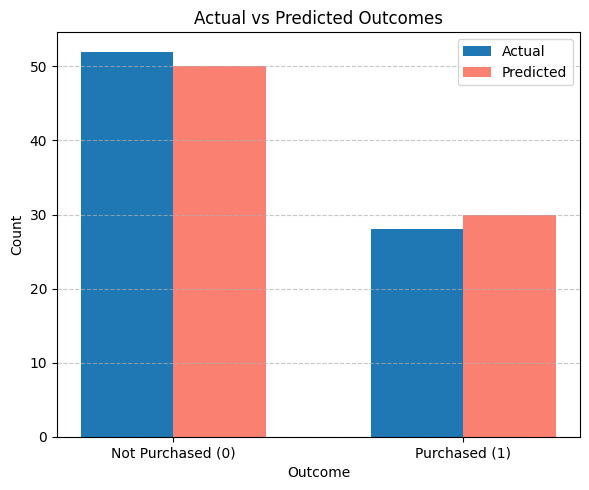

In [124]:
# Compare actual and predicted values
actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(y_pred)

labels = ['Not Purchased (0)', 'Purchased (1)']

x = np.arange(len(labels))
width = 0.32

plt.figure(figsize=(6,5))
plt.bar(x - width/2, actual_counts, width, label='Actual', color='#1f77b4')
plt.bar(x + width/2, predicted_counts, width, label='Predicted', color='salmon')

plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Actual vs Predicted Outcomes')
plt.xticks(ticks=x, labels=labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
